# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

## Opening the file usinf pandas

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [61]:
df= pd.read_csv('/Users/asalzooashkiany/Documents/ml-project-unsupervised-learning/Wholesale_Data.csv')

In [62]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [63]:
df.shape

(440, 8)

In [64]:
df.isnull().any()

Channel             False
Region              False
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicassen          False
dtype: bool

In [65]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
435    False
436    False
437    False
438    False
439    False
Length: 440, dtype: bool

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [67]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Creating Histogram for all the columns

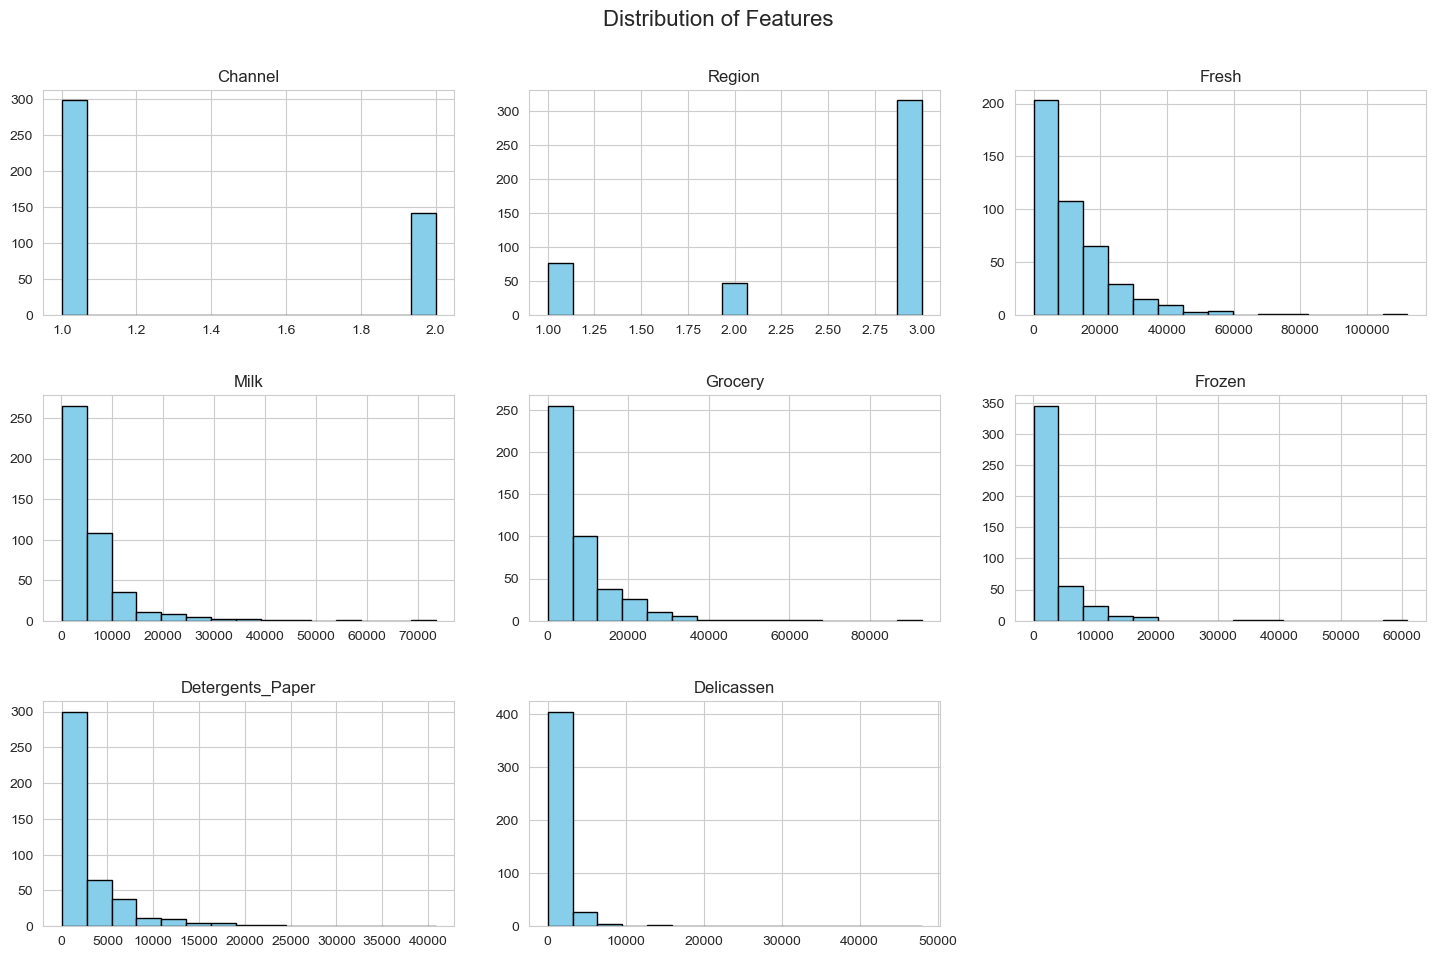

In [68]:
sns.set_style("whitegrid")

# Generating histograms for all columns
df.hist(bins=15, figsize=(15, 10), layout=(3, 3), color='skyblue', edgecolor='black')

# Adjusting layout and aesthetics
plt.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.9)
plt.suptitle('Distribution of Features', size=16)

# Displaing the plots
plt.show()

## detecting outliers 

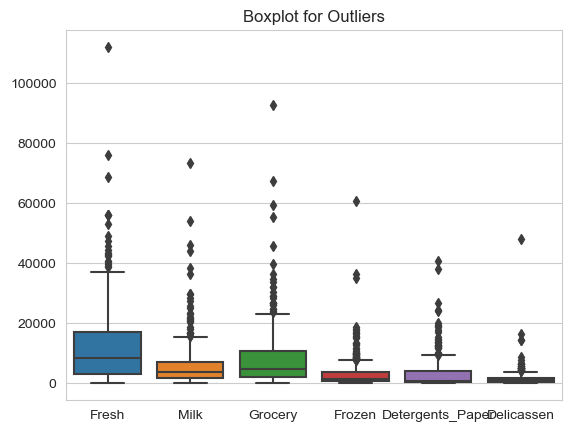

In [69]:
sns.boxplot(data=df[['Fresh', 'Milk', 'Grocery','Frozen','Detergents_Paper','Delicassen']])
plt.title('Boxplot for Outliers')
plt.show()

## Generating Heatmap
### -"Grocery" and "Detergents_Paper" have a strong positive correlation
### -"Milk" also shows a positive correlation with "Grocery" and "Detergents_Paper"
### -"Channel" has a moderat correlation with "Grocery," "Milk," and "Detergents_Paper"
### - "Channel" has a weak negative correlation with "Fresh" and "Frozen"

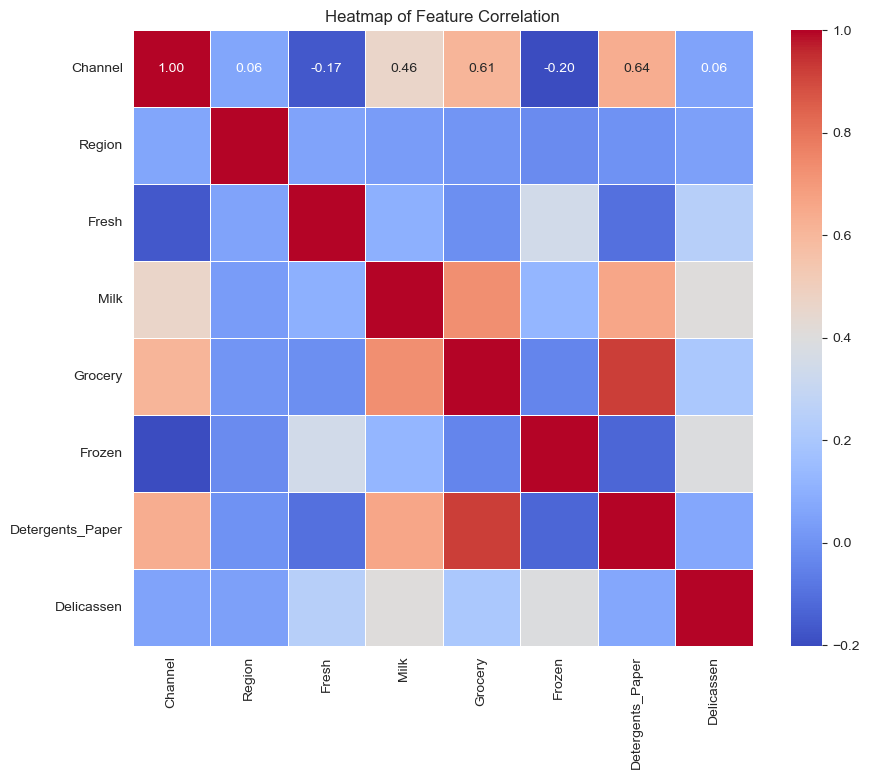

In [70]:

corr = df.corr()

# Generating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Feature Correlation')
plt.show()


## Scatter plot between the "Fresh" and "Milk" variables 
### -there is a weak correlation between the two variables

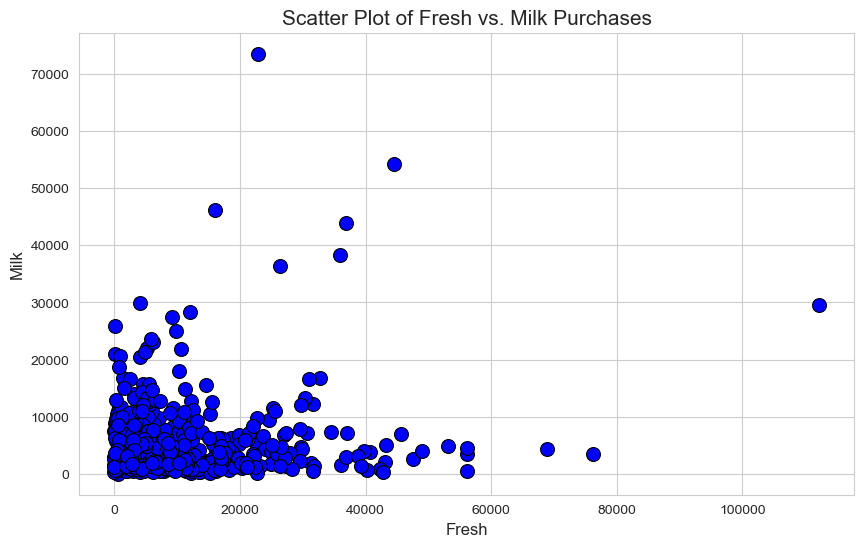

In [71]:
sns.set_style("whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Fresh'], y=df['Milk'], color='blue', edgecolor='black', s=100)

# Adding titles and labels
plt.title('Scatter Plot of Fresh vs. Milk Purchases', size=15)
plt.xlabel('Fresh', size=12)
plt.ylabel('Milk', size=12)

# Display the plot
plt.show()

## since we are doing clustering and having outliers can make the model worse i decided to drop them

In [72]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Defining a mask for rows without outliers
mask = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# Appling the mask to get a DataFrame without outliers
df= df[mask]

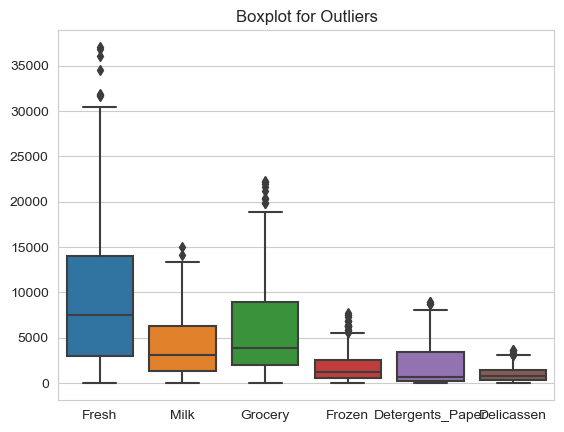

In [73]:

sns.boxplot(data=df[['Fresh', 'Milk', 'Grocery','Frozen','Detergents_Paper','Delicassen']])
plt.title('Boxplot for Outliers')
plt.show()

In [74]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Defining a mask for rows without outliers
mask = ~((df < (Q1 - 1 * IQR)) | (df > (Q3 + 1 * IQR))).any(axis=1)

# Appling the mask to get a DataFrame without outliers
df= df[mask]

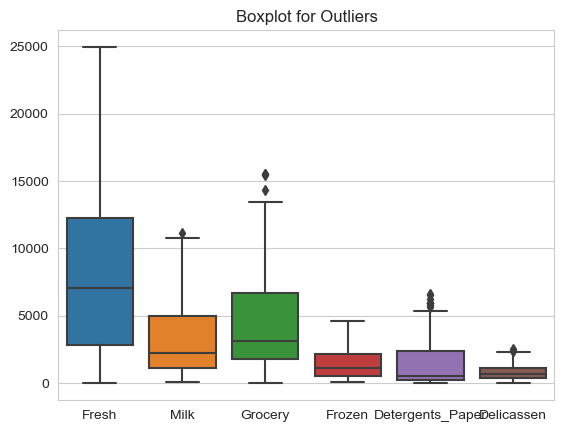

In [75]:
sns.boxplot(data=df[['Fresh', 'Milk', 'Grocery','Frozen','Detergents_Paper','Delicassen']])
plt.title('Boxplot for Outliers')
plt.show()

## We already know which features can be important from heatmap but let's also do a PCA 
### - from below we undrestand 
#### PC1  = explains 45.3% of the variance.
#### PC2 = adds another 21.6%, bringing the total to 66.9%.
#### PC3 =  adds 13.9%, totaling 80.8%.
#### PC4 =adds 11.5%, bringing the cumulative explained variance to 92.3%.

In [76]:
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
x = df.loc[:, features].values

# Standardize the features
x_standardized = StandardScaler().fit_transform(x)

# Apply PCA
pca = PCA()
principalComponents = pca.fit_transform(x_standardized)

# Display the explained variance ratio for each component
print("Explained variance ratio by component:")
for i, var_ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Principal Component {i+1}: {var_ratio:.3f}")

# Optionally, summing the explained variance to see the cumulative variance explained
print("\nCumulative explained variance:")
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
for i, cum_var in enumerate(cumulative_variance):
    print(f"After Principal Component {i+1}: {cum_var:.3f}")

Explained variance ratio by component:
Principal Component 1: 0.448
Principal Component 2: 0.206
Principal Component 3: 0.135
Principal Component 4: 0.129
Principal Component 5: 0.059
Principal Component 6: 0.023

Cumulative explained variance:
After Principal Component 1: 0.448
After Principal Component 2: 0.654
After Principal Component 3: 0.789
After Principal Component 4: 0.918
After Principal Component 5: 0.977
After Principal Component 6: 1.000


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

### here the inertia rapidly decreases as the number of clusters increases from 1 to around 3 or 4, after which the rate of decrease becomes more gradual, So The "elbow" appears to be around 3 or 4 clusters

/Users/asalzooashkiany/anaconda3/envs/test_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/asalzooashkiany/anaconda3/envs/test_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/asalzooashkiany/anaconda3/envs/test_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/asalzooashkiany/anaconda3/envs/test_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

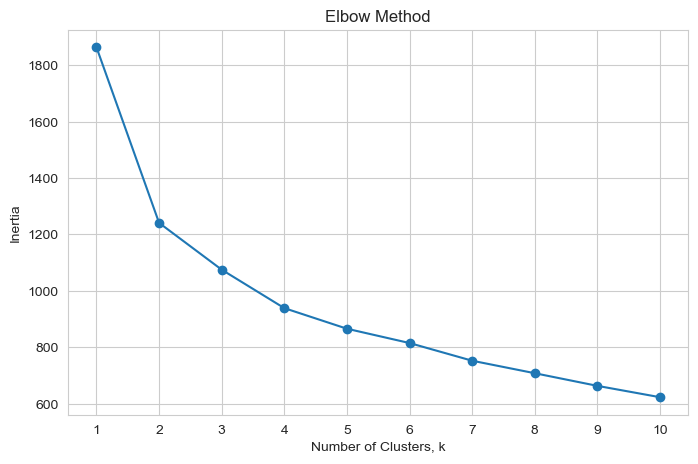

In [94]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


inertia = []
k_values = range(1, 11)  # Adjust the range as needed

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, '-o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()


In [95]:
pca = PCA(n_components=4)  
X_pca = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=4,n_init=10)  # Choose the appropriate number of clusters
kmeans.fit(X_pca)  

KMeans(n_clusters=4, n_init=10)

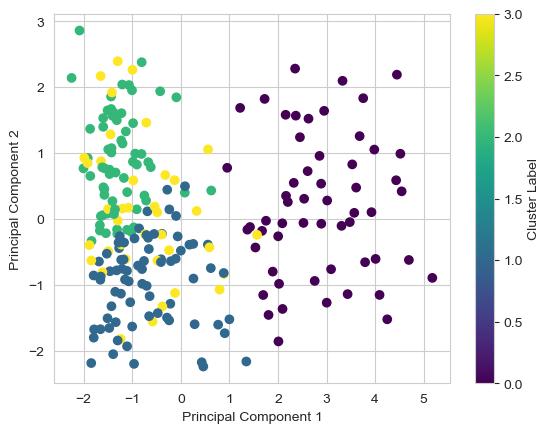

In [96]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

## looking to see if the model is doing well

This shows, on average, closer to the members of their own cluster than to the members of other clusters

In [114]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(X_pca)
labels_pca = kmeans_pca.labels_

# Calculate the silhouette score for k=4
silhouette_avg_pca = silhouette_score(X_pca, labels_pca)
print(f"The silhouette score for k=4 is: {silhouette_avg_pca}")


The silhouette score for k=4 is: 0.2616279337328275


/Users/asalzooashkiany/anaconda3/envs/test_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [122]:
hierarchy_model = AgglomerativeClustering(n_clusters=4, linkage='ward')
Model_clusterd = hierarchy_model.fit_predict(X_pca)

## this model is ahowing better result with higher clustering which is "5"

In [133]:
hierarchy_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Model_clustered = hierarchy_model.fit_predict(X_pca)

# Calculate the silhouette score for n_clusters=3
silhouette_avg_hierarchy = silhouette_score(X_pca, Model_clustered)
print(f"The silhouette score for n_clusters=3 is: {silhouette_avg_hierarchy}")

The silhouette score for n_clusters=3 is: 0.2329604964317093


/Users/asalzooashkiany/anaconda3/envs/test_env/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### this showed me Keeping only the first few components can significantly reduce the size of the dataset while retaining most of the information.

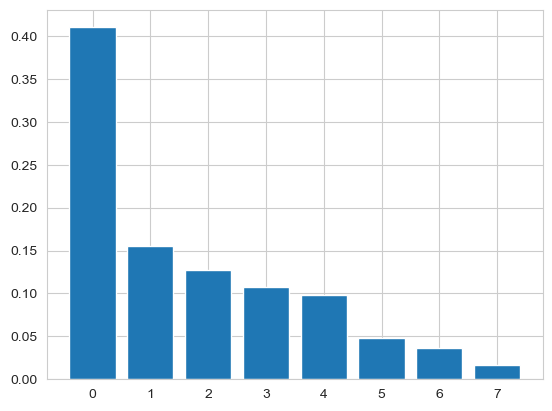

In [135]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.show()




# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

K-Means Clustering: The silhouette score for K-Means clustering with four clusters is approximately 0.262, indicating a fair amount of separation between clusters

Hierarchical Clustering Performance: Hierarchical clustering with five clusters yielded a silhouette score of approximately 0.233, which is lower than K-Means, suggesting less distinction between the clusters

Comparative Cluster Quality: While both clustering methods achieved positive silhouette scores, indicating that on average, samples are closer to their own clusters than to others, K-Means clustering performed slightly better according to this metric

Dominant First Component: The first principal component alone accounts for approximately 44.8% of the variance, indicating a strong underlying factor or combination of features


